In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for two strata
stratum1 = np.random.normal(loc=1, scale=10, size=100)
stratum2 = np.random.normal(loc=10, scale=10, size=100)

# Combine into a DataFrame
data = pd.DataFrame({
    'value': np.concatenate([stratum1, stratum2]),
    'stratum': ['A'] * len(stratum1) + ['B'] * len(stratum2)
})

data.head()


,value,stratum
0,5.967142,A
1,-0.382643,A
2,7.476885,A
3,16.230299,A
4,-1.341534,A


In [62]:
data['value'].var(), data['value'].mean()

(np.float64(112.7339141386854), np.float64(5.092290348279151))

In [63]:
data.groupby('stratum').var()#, data.groupby('stratum').mean(),data.groupby('stratum').size()

,value
stratum,
A,82.476989
B,90.948450


In [69]:
def bootstrap_sample(data, n_iterations=1000):
    means = []
    for _ in range(n_iterations):
        sample = data.sample(frac=1, replace=True)
        means.append(sample['value'].mean())
    return np.array(means)

# Perform bootstrapping without stratification
boot_means = bootstrap_sample(data)

# Calculate variance
variance_no_strat = np.var(boot_means)
print(f"Variance without stratification: {variance_no_strat:.2f}")
print(f"mean without stratification: {np.mean(boot_means):.2f}")


Variance without stratification: 0.59
mean without stratification: 5.07


In [80]:
def stratified_bootstrap_sample(data, n_iterations=100):
    means = []
    for _ in range(n_iterations):
        strata_samples = data.groupby('stratum', group_keys=False).apply(
            lambda x: x.sample(frac=1, replace=True)[['value']]
        )
        means.append(strata_samples['value'].mean())
    return np.array(means)

# Perform bootstrapping with stratification
strat_boot_means = stratified_bootstrap_sample(data)

# Calculate variance
variance_strat = np.var(strat_boot_means)
print(f"Variance with stratification: {variance_strat:.2f}")


Variance with stratification: 0.44


/var/folders/w4/7g9wdths4qg7_7k_g1k5h7fw0000gn/T/ipykernel_50500/1736051168.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strata_samples = data.groupby('stratum', group_keys=False).apply(
/var/folders/w4/7g9wdths4qg7_7k_g1k5h7fw0000gn/T/ipykernel_50500/1736051168.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strata_samples = data.groupby('stratum', group_keys=False).apply(
/var/folders/w4/7g9wdt

In [76]:
print(f"Variance with stratification: {variance_strat:.2f}")
print(f"mean without stratification: {np.mean(strat_boot_means):.2f}")

Variance with stratification: 0.44
mean without stratification: 5.06


In [77]:
print(f"Variance with stratification: {variance_strat:.2f}")
print(f"mean without stratification: {np.mean(strat_boot_means):.2f}")

Variance with stratification: 0.44
mean without stratification: 5.06


In [81]:
# cupid

ModuleNotFoundError: No module named 'hvplot'

In [83]:
!pip install hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 28.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 37.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [84]:
#https://whiteding.fun/post/statistics/CUPED%E6%96%B9%E5%B7%AE%E7%BC%A9%E5%87%8F/
import pandas as pd
import numpy as np
import hvplot.pandas
from scipy.stats import pearsonr
from scipy.optimize import minimize


def generate_data(treatment_effect, size):
    # generate y from a normal distribution
    df = pd.DataFrame({'y': np.random.normal(loc=0, scale=1, size=size)})
    # create a covariate that's corrected with y 
    df['x'] = minimize(
        lambda x: 
        abs(0.95 - pearsonr(df.y, x)[0]), 
        np.random.rand(len(df.y))).x
    # random assign rows to two groups 0 and 1 
    df['group'] = np.random.randint(0,2, df.shape[0])
    # for treatment group add a treatment effect 
    df.loc[df["group"] == 1, 'y'] += treatment_effect
    return df    

df = generate_data(treatment_effect=1, size=10000)
theta = df.cov()['x']['y'] / df.cov()['x']['x']
df['y_cuped'] = df.y - theta * df.x

# cuped前后的分布图
(
    df.hvplot.kde('y', by='group', xlim = [-5,5], color=['#F9a4ba', '#f8e5ad']) 
    + df.hvplot.kde('y_cuped', by='group', xlim = [-5,5], color=['#F9a4ba', '#f8e5ad'])
)

:Layout
   .NdOverlay.I  :NdOverlay   [group]
      :Distribution   [y]   (Density)
   .NdOverlay.II :NdOverlay   [group]
      :Distribution   [y_cuped]   (Density)

In [86]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Without CUPED: Mean A: 10.460712596701315, Mean B: 11.864655188473645
Without CUPED: Variance A: 25.245071718282706, Variance B: 29.8596793400447
With CUPED: Mean A: 10.460712596701313, Mean B: 11.864655188473641
With CUPED: Variance A: 22.03465094423018, Variance B: 25.345863061211066


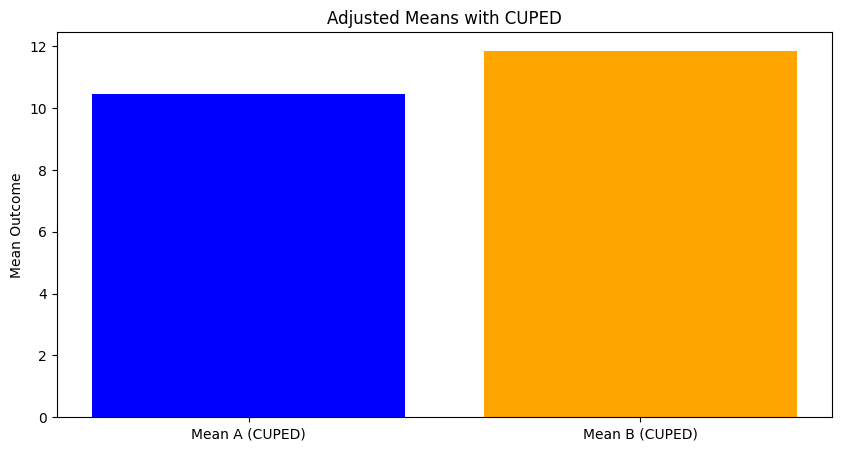

In [87]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 设置随机种子以确保可重复性
np.random.seed(42)

# 定义参数
n = 1000  # 每组的样本量
baseline_mean = 10  # 基线均值
treatment_effect = 2  # 处理效果
baseline_std = 5  # 基线标准差

# 模拟数据
def simulate_data(n, treatment_effect, baseline_mean, baseline_std):
    baseline_data = np.random.normal(loc=baseline_mean, scale=baseline_std, size=n)
    treatment = np.random.choice([0, 1], size=n)  # 随机分配处理
    outcome = baseline_data + treatment * treatment_effect + np.random.normal(0, 2, n)  # 加入误差
    return baseline_data, treatment, outcome

# 不使用CUPED的A/B测试
baseline_data, treatment, outcome = simulate_data(n, treatment_effect, baseline_mean, baseline_std)
data = pd.DataFrame({'Baseline': baseline_data, 'Treatment': treatment, 'Outcome': outcome})

# 计算A/B测试的均值和方差
mean_outcome_A = data[data['Treatment'] == 0]['Outcome'].mean()
mean_outcome_B = data[data['Treatment'] == 1]['Outcome'].mean()
var_outcome_A = data[data['Treatment'] == 0]['Outcome'].var()
var_outcome_B = data[data['Treatment'] == 1]['Outcome'].var()

print(f"Without CUPED: Mean A: {mean_outcome_A}, Mean B: {mean_outcome_B}")
print(f"Without CUPED: Variance A: {var_outcome_A}, Variance B: {var_outcome_B}")

# 使用CUPED调整
X = sm.add_constant(data[['Baseline', 'Treatment']])
model = sm.OLS(data['Outcome'], X).fit()
data['Adjusted_Outcome'] = model.predict(X)

# 计算调整后的均值和方差
mean_adjusted_A = data[data['Treatment'] == 0]['Adjusted_Outcome'].mean()
mean_adjusted_B = data[data['Treatment'] == 1]['Adjusted_Outcome'].mean()
var_adjusted_A = data[data['Treatment'] == 0]['Adjusted_Outcome'].var()
var_adjusted_B = data[data['Treatment'] == 1]['Adjusted_Outcome'].var()

print(f"With CUPED: Mean A: {mean_adjusted_A}, Mean B: {mean_adjusted_B}")
print(f"With CUPED: Variance A: {var_adjusted_A}, Variance B: {var_adjusted_B}")

# 可视化结果
plt.figure(figsize=(10, 5))
plt.bar(['Mean A (CUPED)', 'Mean B (CUPED)'], [mean_adjusted_A, mean_adjusted_B], color=['blue', 'orange'])
plt.title('Adjusted Means with CUPED')
plt.ylabel('Mean Outcome')
plt.show()

In [88]:
data

,Baseline,Treatment,Outcome,Adjusted_Outcome
0,12.483571,0,11.752928,12.509526
1,9.308678,1,11.678039,11.395077
2,13.238443,0,10.544190,13.261806
3,17.615149,1,17.671921,19.673026
4,8.829233,0,11.230061,8.867736
...,...,...,...,...
995,8.594499,1,12.664997,10.683349
996,18.988433,0,15.296057,18.992052
997,13.204214,1,13.345193,15.277237
998,7.144105,0,4.151047,7.188395
